# A basic model

This quick introductory example demonstrates how to use `gwrefpy` to analyze an observation and a reference well, calibrate a model, save the project, and then reload and visualize the results.

We will go step by step:
1. Store the data in `Well` objects  
2. Build a `Model` and run calibration  
3. Save the project and reload it  
4. Plot the results  


In [1]:
import gwrefpy as gr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging

logging.basicConfig(level=logging.ERROR)

Logging is configured.


## 1. Import groundwater level measurements 
Importing groundwaterlevel for a reference well and a observationswell as csv files and creates panda series.

In [2]:
dates = pd.date_range(start="2020-01-01", periods=365, freq="D")

obs_series = pd.Series(np.sin(np.linspace(0, 4 * np.pi, 365)), index=dates)
ref_series = pd.Series(np.sin(np.linspace(0, 4 * np.pi, 365) + 0.5), index=dates)

## 2. Create well objects 💧

We now add our time series to `Well` objects.  The following boolean condition marks if the well is reference or observation. 
- `is_reference=False` for the observation well  
- `is_reference=True` for the reference well  

In [3]:

obs = gr.Well(name="Obs_well", is_reference=False, timeseries=obs_series)
ref = gr.Well(name="Ref_well", is_reference=True, timeseries=ref_series)

## 3. Build a model and calibrate ⚙️

We create a `Model` and add both the reference well and the observation well.
Then we choose a calibration period – here we just use the whole time series.
The `model.fit` function takes the observation well (`obs`), the reference well (`ref`), the (`time_equivalent`), and the start and end dates of the calibration period. It checks how well the reference well values match the observation well values. 

In [6]:
model = gr.Model(name="my first model")
model.add_well(obs)
model.add_well(ref)

model.fit(
    obs,
    ref,
    offset="0D"
)

Added one well to model 'my first model'.
Added one well to model 'my first model'.
Fit completed for model 'my first model' with RMSE 0.8770304495439567.
Fitting model 'my first model' using reference well 'Ref_well' and observation well 'Obs_well'.


Statistic,Value,Description
RMSE,0.8770,Root Mean Square Error
R²,0.7692,Coefficient of Determination
R-value,0.8770,Correlation Coefficient
Slope,0.8765,Linear Regression Slope
Intercept,-0.0012,Linear Regression Intercept
P-value,0.0000,Statistical Significance
N,365,Number of Data Points
Std Error,0.3402,Standard Error
Confidence,95.0%,Confidence Level


## 4. Plot the results 📈

Finally, we plot the calibrated model using the built-in plotting functionality.

Plotting well: Obs_well
Plotting fit for well: Obs_well
Plotting well: Ref_well
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
fi

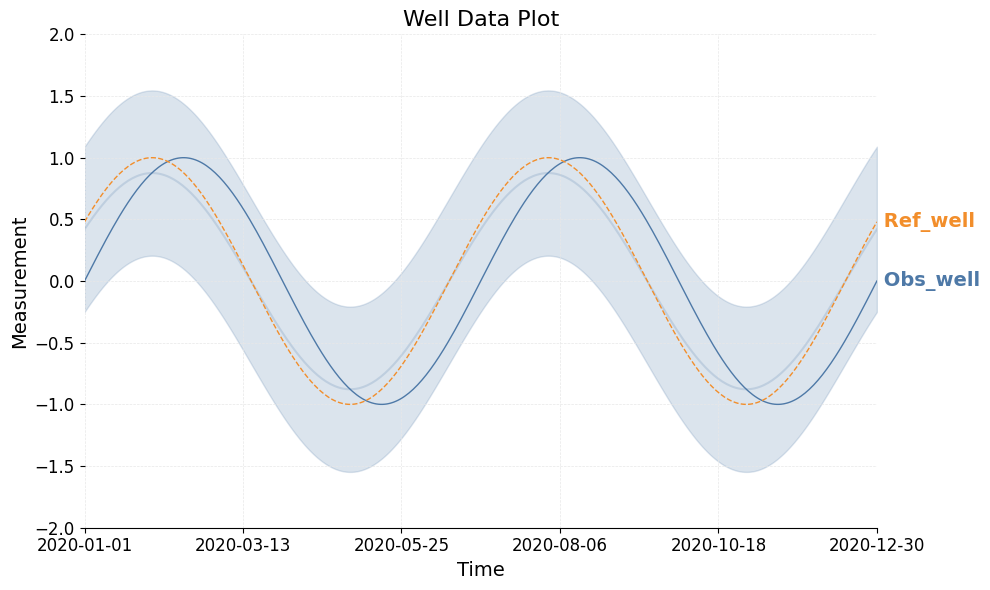

In [7]:
model.plot()
plt.show()
